In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme(style='whitegrid')

In [ ]:
from google.colab import files
files.upload()

Saving howpop_train.csv to howpop_train.csv


In [ ]:
df = pd.read_csv('howpop_train.csv')

In [ ]:
df = df[df.columns[~df.columns.str.endswith('_lognorm')]].copy()
df['published'] = pd.to_datetime(df['published'])
df['year'], df['month'], df['dayofweek'], df['hour'] = df['published'].dt.year, df['published'].dt.month, df['published'].dt.dayofweek, df['published'].dt.hour 

In [ ]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,1,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,1,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,1,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,2,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,2,14


1. В якому році та місяці було найбільше публікацій?

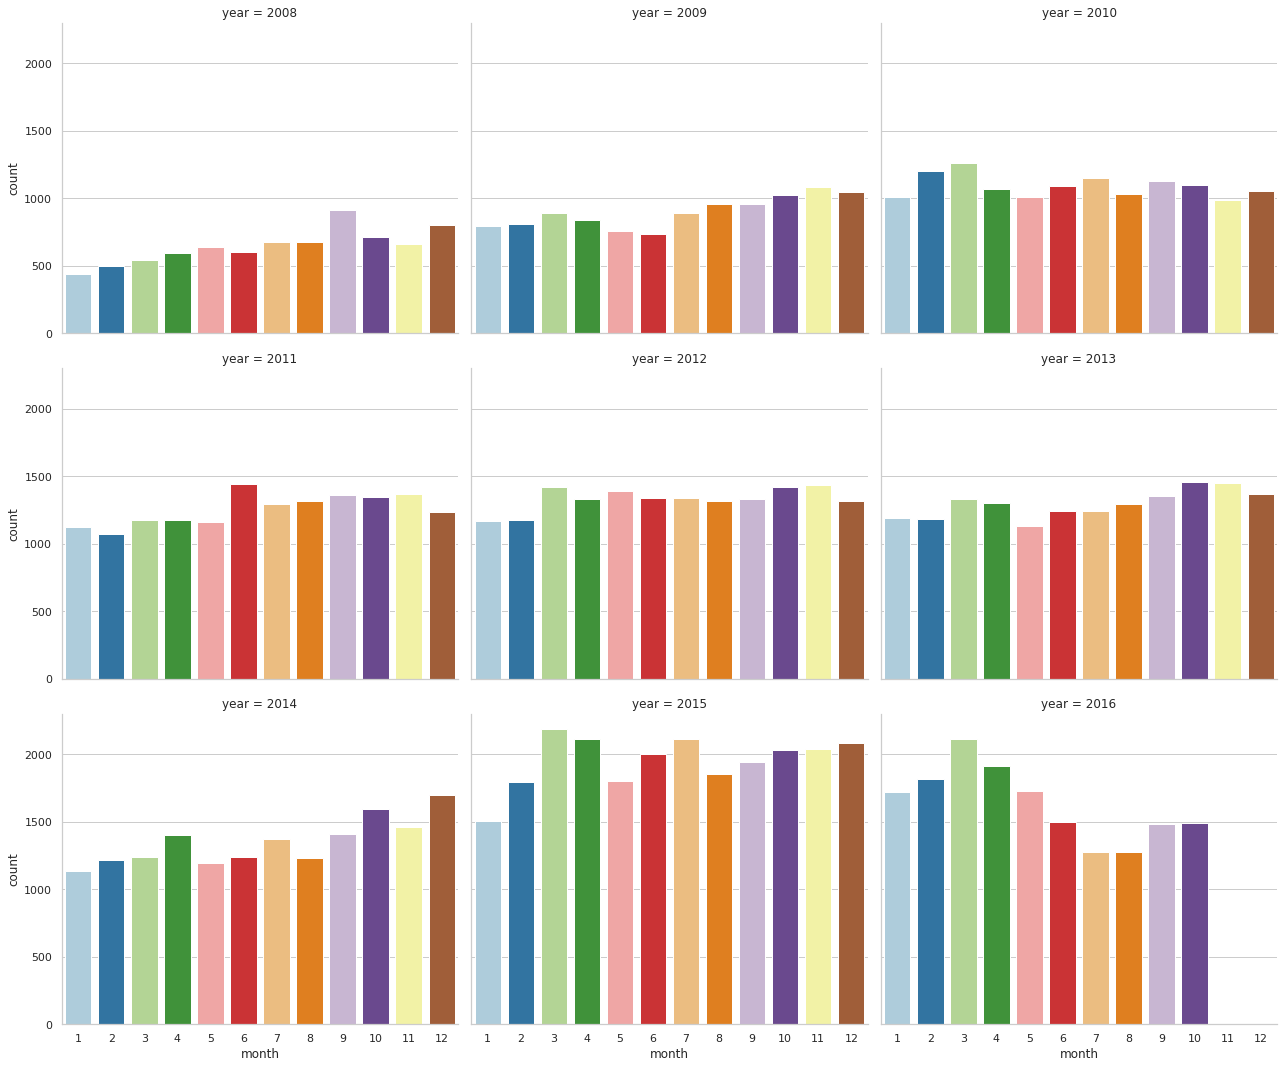

In [ ]:
_ = sns.catplot(x='month', col='year', kind='count', data=df, col_wrap=3, aspect=1.2, palette='Paired')

Березень 2015

2. Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька
варіантів.

In [ ]:
most_pubs_month = df[(df['year'] == 2015) & (df['month'] == 3)]

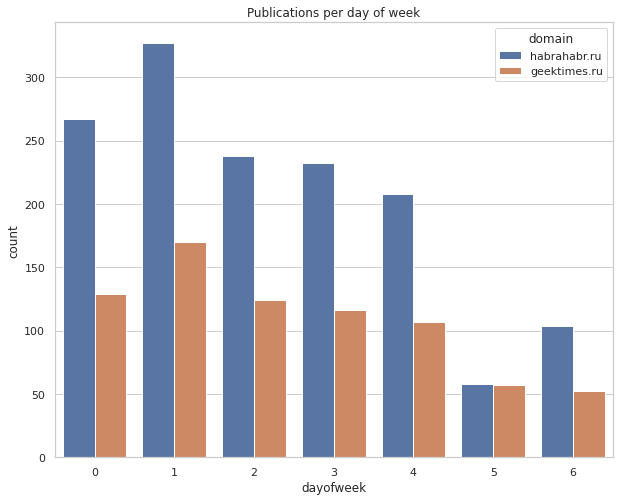

In [ ]:
plt.figure(figsize=(10, 8))
_ = sns.countplot(x='dayofweek', hue='domain', data=most_pubs_month).set_title('Publications per day of week')

Один або кілька днів сильно виділяються із загальної картини  
(дуже мала кількість публікацій в суботу та неділю)

3. Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів.

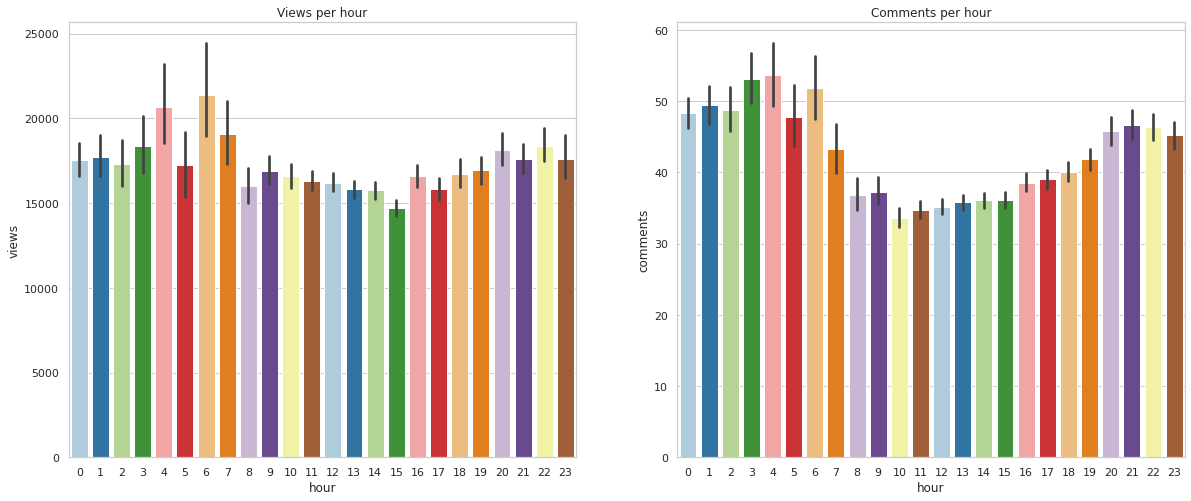

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(20, 8))
_ = sns.barplot(x='hour', y='views', data=df, palette='Paired', ax=axes[0]).set_title('Views per hour')
_ = sns.barplot(x='hour', y='comments', data=df, palette='Paired', ax=axes[1]).set_title('Comments per hour')

In [ ]:
# note: creating plot which shows number of views/comments for each post takes too long
geektimes_pubs = df[df['domain'] == 'geektimes.ru']
geektimes_pubs['views'].idxmax() == geektimes_pubs['comments'].idxmax()

False

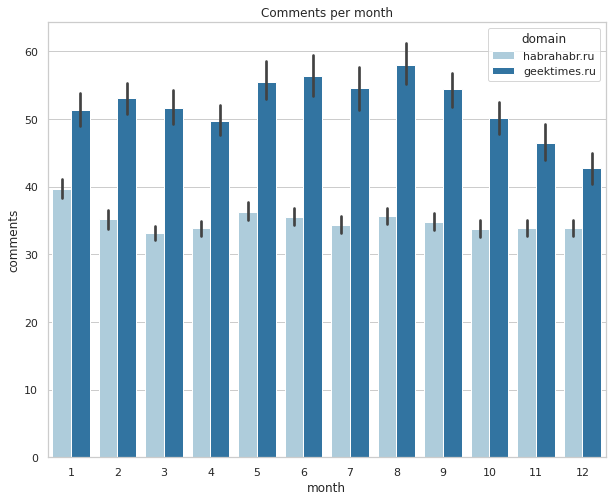

In [ ]:
plt.figure(figsize=(10, 8))
_ = sns.barplot(x='month', y='comments', hue='domain', data=df, palette='Paired').set_title('Comments per month')

Найбільше переглядів набирають статті, опубліковані вранці та ввечері
(кількість переглядів з 4 по 7 ранку та з 20 по 22 вечору більші, ніж на інших проміжках часу) 

4. Кого з топ-20 авторів найчастіше плюсують?

In [ ]:
top_authors = df.groupby('author')['votes_plus'].agg([np.sum, np.mean]).nlargest(20, ['sum', 'mean']).reset_index()

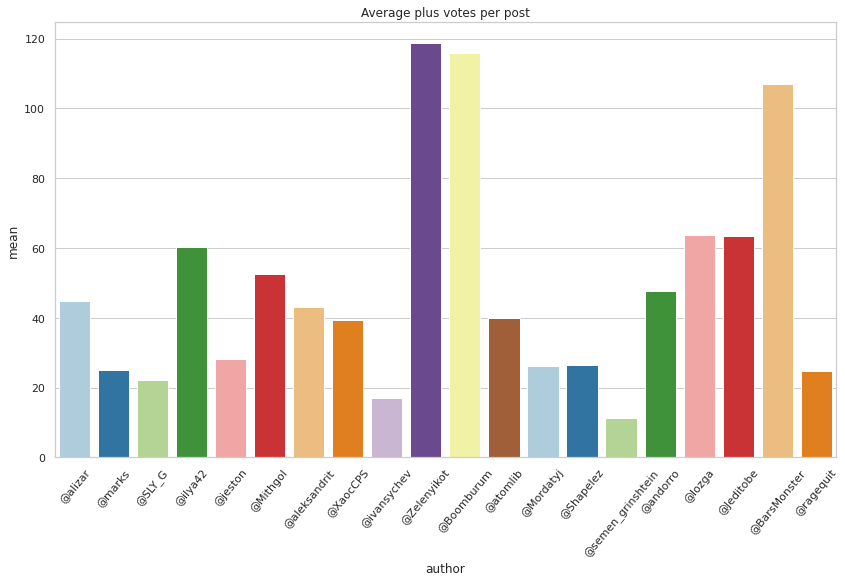

In [ ]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=50)
_ = sns.barplot(x='author', y='mean', data=top_authors, palette='Paired').set_title('Average plus votes per post')

@Mithgol  
(серед наданих варіантів  єдиний, хто входить у топ 20 за загальною кількістю плюсів)  
@Zelenyikot має найбільше середнє значення плюсів в топ 20

5. Порівняйте вихідні та будні дні. Чи правда, що на вихідних автори пишуть в
основному вранці, а по буднях – в основному ввечері?

In [ ]:
weekdays_mask = df['dayofweek'] < 5
weekends_mask = ~weekdays_mask
weekdays_pubs, weekends_pubs = df[weekdays_mask], df[weekends_mask]

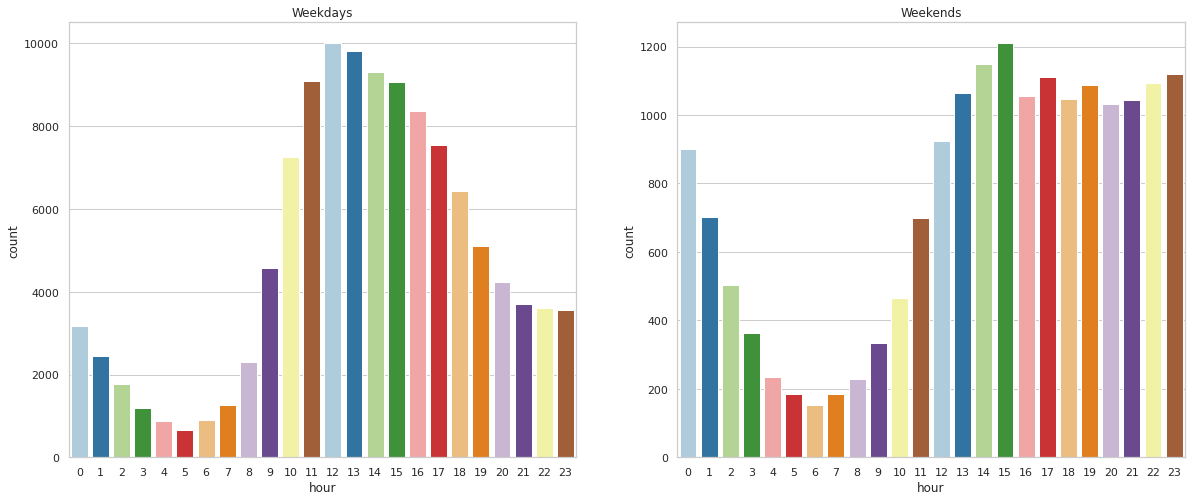

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(20, 8))
_ = sns.countplot(x='hour', data=weekdays_pubs, palette='Paired', ax=axes[0]).set_title('Weekdays')
_ = sns.countplot(x='hour', data=weekends_pubs, palette='Paired', ax=axes[1]).set_title('Weekends')

У будні автори найбільше пишуть в обідній час  
На вихідних автори пишуть вдень та ввечері